# Introduction - part 1

## The Philosophy of Bayesian Inference

  
> You are a skilled programmer, but bugs still slip into your code. After a particularly difficult implementation of an algorithm, you decide to test your code on a trivial example. It passes. You test the code on a harder problem. It passes once again. And it passes the next, *even more difficult*, test too! You are starting to believe that there may be no bugs in this code...



- Bayesian inference is simply updating your beliefs after considering new evidence. 
- A Bayesian can rarely be certain about a result, but he or she can be very confident. 
- Bayesian inference works identically: we update our beliefs about an outcome; rarely can we be absolutely sure unless we rule out all other alternatives. 


### The Bayesian state of mind


- Bayesian inference differs from more traditional statistical inference by preserving *uncertainty*. 
- The Bayesian world-view interprets probability as measure of *believability in an event*, that is, how confident we are in an event occurring. 


- An alternative interpretation of probability is *Frequentist*, which assumes that probability is the long-run frequency of events. 
- For example, the *probability of plane accidents* under a frequentist philosophy is interpreted as the *long-term frequency of plane accidents*.  


- Bayesians interpret a probability as measure of *belief*, or confidence, of an event occurring. 
   - An individual who assigns a belief of 0 to an event has full confidence that the event will *not* occur;
   - conversely, assigning a belief of 1 implies that the individual is absolutely certain of an event occurring.
   - Beliefs between 0 and 1 allow for weightings of other outcomes. 



- Belief (probability) is assigned to an *individual*, not to Nature. 
    - this definition leaves room for conflicting beliefs between individuals. 
    - different individuals have different beliefs of events occurring, because they possess different *information* about the world. 


#### Example

- I flip a coin, and we both guess the result. 
- We would both agree, assuming the coin is fair, that the probability of Heads is 1/2. 
- Assume, then, that I peek at the coin. Now I know for certain what the result is: I assign probability 1.0 to either Heads or Tails. 
- Now what is *your* belief that the coin is Heads? My knowledge of the outcome has not changed the coin's results. 
- Thus we assign different probabilities to the result. 



#### Further examples 

-  Your code either has a bug in it or not, but we do not know for certain which is true, though we have a belief about the presence or absence of a bug.  

-  A medical patient is exhibiting symptoms $x$, $y$ and $z$. There are a number of diseases that could be causing all of them, but only a single disease is present. A doctor has beliefs about which disease, but a second doctor may have slightly different beliefs. 



#### Belief = Probability

We denote our belief about event $A$ as $P(A)$. We call this quantity the *prior probability*.


We denote our updated belief as $P(A |X )$, interpreted as the probability of $A$ given the evidence $X$. 

- We call the updated belief the *posterior probability* so as to contrast it with the prior probability. 



For example, consider the posterior probabilities (read: posterior beliefs) of the above examples, after observing some evidence $X$:

1. $P(A):$ the coin has a 50 percent chance of being Heads. $P(A | X):$ You look at the coin, observe a Heads has landed, denote this information $X$, and trivially assign probability 1.0 to Heads and 0.0 to Tails.




2.   $P(A):$  This big, complex code likely has a bug in it. $P(A | X):$ The code passed all $X$ tests; there still might be a bug, but its presence is less likely now.


3.  $P(A):$ The patient could have any number of diseases. $P(A | X):$ Performing a blood test generated evidence $X$, ruling out some of the possible diseases from consideration.


- we did not completely discard the prior belief after seeing new evidence $X$, but we *re-weight the prior* to incorporate the new evidence. 

- By introducing prior uncertainty about events, we are already admitting that any guess we make is potentially very wrong. 
- After observing data evidence, we update our beliefs, and our guess becomes *less wrong*. 


### Bayesian Inference in Practice

- A function implementing Bayesian inference with inputs being statistical problems would return *probabilities*.

For example, in a debugging problem, asking our Bayesian function "Often my code has bugs. My code passed all $X$ tests; is my code bug-free?" would return probabilities of *YES* and *NO*. The function might return:


>    *YES*, with probability 0.8; *NO*, with probability 0.2



- By introducing a prior, and returning probabilities (instead of a scalar estimate), we *preserve the uncertainty*. 

### The Bayesian framework

Updating our belief is done via the following equation, known as Bayes' Theorem, after its discoverer Thomas Bayes:

\begin{align}
 P( A | X ) = & \frac{ P(X | A) P(A) } {P(X) } \\\\[5pt]
& \propto P(X | A) P(A)\;\; (\propto \text{is proportional to } )
\end{align}


#### Example: coin-flip example

- Suppose that you are unsure about the probability of heads in a coin flip. You believe there is some true underlying ratio, call it $p$, but have no prior opinion on what $p$ might be. 

- We begin to flip a coin, and record the observations: either $H$ or $T$. This is our observed data. 

- How our inference changes as we observe more and more data? 

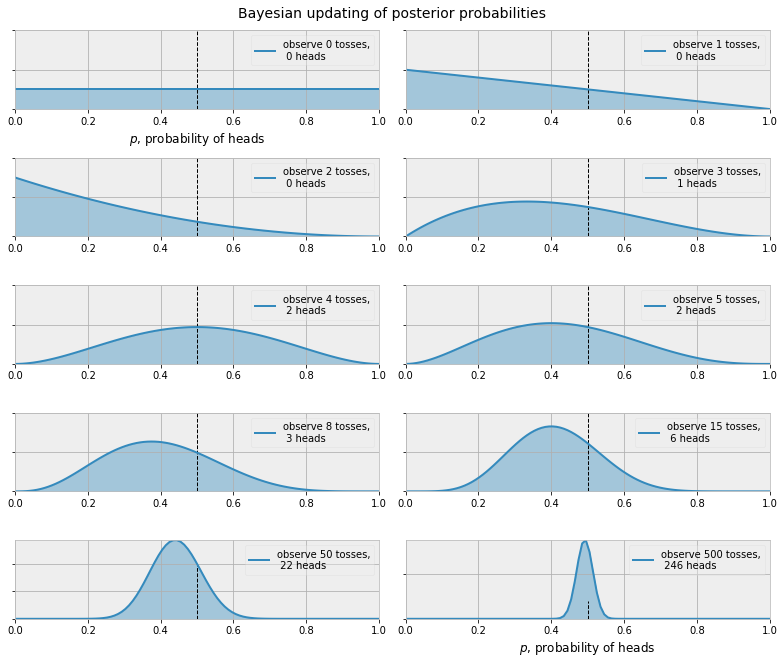

In [3]:
"""
The book uses a custom matplotlibrc file, which provides the unique styles for
matplotlib plots. If executing this book, and you wish to use the book's
styling, provided are two options:
    1. Overwrite your own matplotlibrc file with the rc-file provided in the
       book's styles/ dir. See http://matplotlib.org/users/customizing.html
    2. Also in the styles is  bmh_matplotlibrc.json file. This can be used to
       update the styles in only this notebook. Try running the following code:



"""

import json, matplotlib
s = json.load( open("../styles/bmh_matplotlibrc.json") )
matplotlib.rcParams.update(s)

# The code below can be passed over, as it is currently not important, plus it
# uses advanced topics we have not covered yet. LOOK AT PICTURE, MICHAEL!
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
figsize(11, 9)

import scipy.stats as stats

dist = stats.beta
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]
data = stats.bernoulli.rvs(0.5, size=n_trials[-1])
x = np.linspace(0, 1, 100)

# For the already prepared, I'm using Binomial's conj. prior.
for k, N in enumerate(n_trials):
    sx = plt.subplot(len(n_trials) / 2, 2, k + 1)
    plt.xlabel("$p$, probability of heads") \
        if k in [0, len(n_trials) - 1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    plt.plot(x, y, label="observe %d tosses,\n %d heads" % (N, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)


plt.suptitle("Bayesian updating of posterior probabilities",
             y=1.02,
             fontsize=14)

plt.tight_layout()

#### Example: Bug, or just sweet, unintended feature?


- Let $A$ denote the event that our code has **no bugs** in it. Let $X$ denote the event that the code passes all debugging tests. For now, we will leave the prior probability of no bugs as a variable, i.e. $P(A) = p$. 

- We are interested in $P(A|X)$, i.e. the probability of no bugs, given our debugging tests $X$ pass. T

- What is $P(X | A)$, i.e., the probability that the code passes $X$ tests *given* there are no bugs? Well, it is equal to 1, for code with no bugs will pass all tests. 

- $P(X)$ is a little bit trickier: The event $X$ can be divided into two possibilities, event $X$ occurring even though our code *indeed has* bugs, or event $X$ without bugs ($A$). 

\begin{align}
P(X ) & = P(X \text{ and } A) + P(X \text{ and } \sim A) \\\\[5pt]
 & = P(X|A)P(A) + P(X | \sim A)P(\sim A)\\\\[5pt]
& = P(X|A)p + P(X | \sim A)(1-p)
\end{align}

- $P(X | \sim A)$ is **subjective**: our code can pass tests but still have a bug in it. Let's be conservative and assign $P(X|\sim A) = 0.5$. 

\begin{align}
P(A | X) & = \frac{1\cdot p}{ 1\cdot p +0.5 (1-p) } \\\\
& = \frac{ 2 p}{1+p}
\end{align}
This is the posterior probability. What does it look like as a function of our prior, $p \in [0,1]$? 

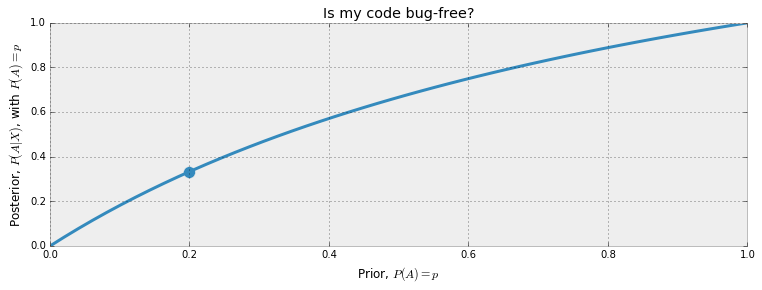

In [2]:
figsize(12.5, 4)
p = np.linspace(0, 1, 50)
plt.plot(p, 2 * p / (1 + p), color="#348ABD", lw=3)
# plt.fill_between(p, 2*p/(1+p), alpha=.5, facecolor=["#A60628"])
plt.scatter(0.2, 2 * (0.2) / 1.2, s=140, c="#348ABD")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Prior, $P(A) = p$")
plt.ylabel("Posterior, $P(A|X)$, with $P(A) = p$")
plt.title("Is my code bug-free?")

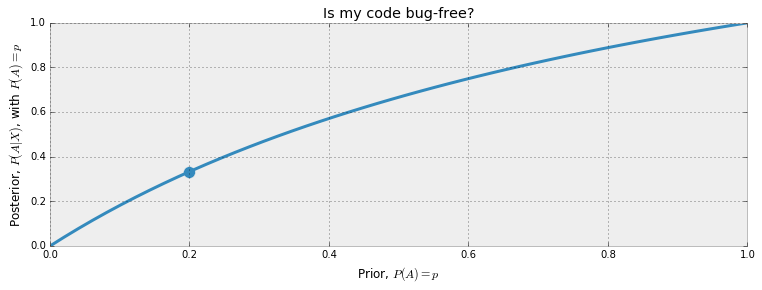

In [2]:
figsize(12.5, 4)
p = np.linspace(0, 1, 50)
plt.plot(p, 2 * p / (1 + p), color="#348ABD", lw=3)
# plt.fill_between(p, 2*p/(1+p), alpha=.5, facecolor=["#A60628"])
plt.scatter(0.2, 2 * (0.2) / 1.2, s=140, c="#348ABD")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Prior, $P(A) = p$")
plt.ylabel("Posterior, $P(A|X)$, with $P(A) = p$")
plt.title("Is my code bug-free?")

Text(0, 0.5, 'Assumption, $P(X|\\sim A)$')

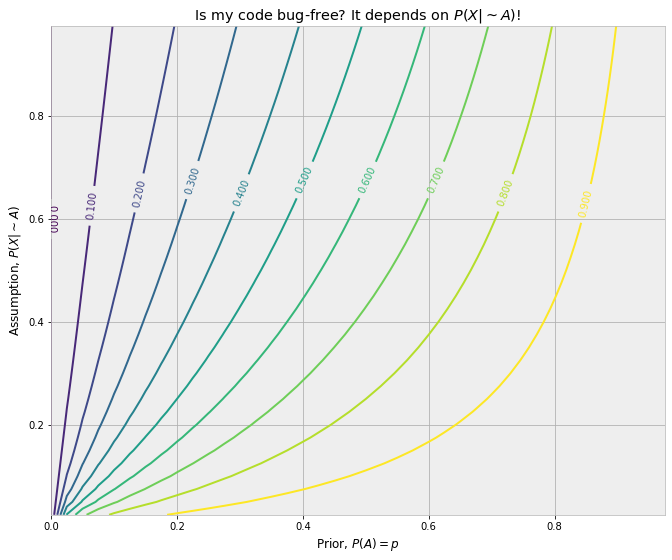

In [2]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt


delta = 0.025
p = np.arange(0, 1, delta)
q = np.arange(delta, 1, delta)
P, Q = np.meshgrid(p, q)
Z = P / (P + (1-P)*Q)

fig, ax = plt.subplots()
CS = ax.contour(P, Q, Z, np.arange(0,1,0.1))
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Is my code bug-free? It depends on $P(X|\sim A)!$')
plt.xlabel('Prior, $P(A)=p$')
plt.ylabel('Assumption, $P(X|\sim A)$')

- We can see the biggest gains if we observe the $X$ tests passed when the prior probability, $p$, is low. 


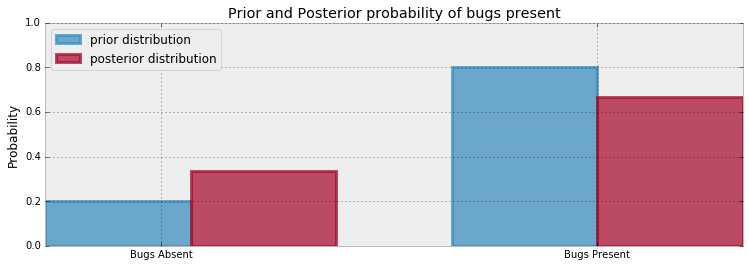

In [3]:
figsize(12.5, 4)
colours = ["#348ABD", "#A60628"]

prior = [0.20, 0.80]
posterior = [1. / 3, 2. / 3]
plt.bar([0, .7], prior, alpha=0.70, width=0.25,
        color=colours[0], label="prior distribution",
        lw="3", edgecolor=colours[0])

plt.bar([0 + 0.25, .7 + 0.25], posterior, alpha=0.7,
        width=0.25, color=colours[1],
        label="posterior distribution",
        lw="3", edgecolor=colours[1])

plt.ylim(0,1)
plt.xticks([0.20, .95], ["Bugs Absent", "Bugs Present"])
plt.title("Prior and Posterior probability of bugs present")
plt.ylabel("Probability")
plt.legend(loc="upper left");

- Notice that after we observed $X$ occur, the probability of bugs being absent increased. 
- By increasing the number of tests, we can approach confidence (probability 1) that there are no bugs present.

This was a very simple example of Bayesian inference and Bayes rule. Unfortunately, the mathematics necessary to perform more complicated Bayesian inference only becomes more difficult.

## Probability Distributions


- Let $Z$ be some random variable. 
- Then associated with $Z$ is a *probability distribution function* that assigns probabilities to the different outcomes $Z$ can take. 

We can divide random variables into three classifications:

-   **Discrete** random variables may only assume values on a specified list. 

-   **Continuous** random variable can take on arbitrarily exact values. 

- **Mixed** random variables assign probabilities to both discrete and continuous random variables, i.e. it is a combination of the above two categories. 


The **Expected value** (EV) is one of the most important concepts in probability. 
- it is the mean value in the long run for many repeated samples from that distribution.


### Discrete case
- If $Z$ is discrete, then its distribution is called a *probability mass function*, denoted as $P(Z=k)$. 

We say $Z$ is *Poisson*-distributed if:

$$P(Z = k) =\frac{ \lambda^k e^{-\lambda} }{k!}, \; \; k=0,1,2, \dots, \; \; \lambda \in \mathbb{R}_{>0} $$

$\lambda$ is called a **parameter** of the distribution, and it controls the distribution's shape. For the Poisson distribution, $\lambda$ can be any positive number. By increasing $\lambda$, we add more probability to larger values, and conversely by decreasing $\lambda$ we add more probability to smaller values. One can describe $\lambda$ as the *intensity* of the Poisson distribution. 



If a random variable $Z$ has a Poisson mass distribution, we denote this by writing

$$Z \sim \text{Poi}(\lambda) $$



One useful property of the Poisson distribution is that its expected value is equal to its parameter, i.e.:

$$E[ Z |  \lambda ] = \lambda $$


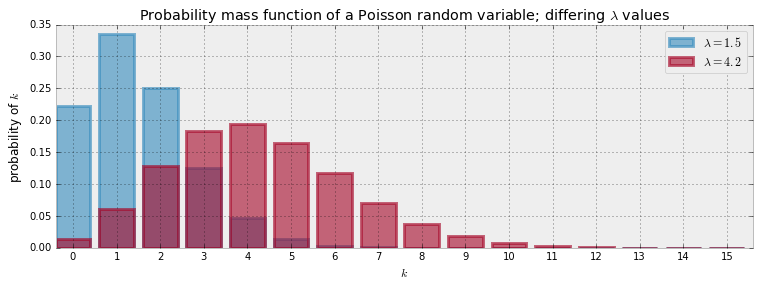

In [4]:
figsize(12.5, 4)

import scipy.stats as stats
a = np.arange(16)
poi = stats.poisson
lambda_ = [1.5, 4.25]
colours = ["#348ABD", "#A60628"]

plt.bar(a, poi.pmf(a, lambda_[0]), color=colours[0],
        label="$\lambda = %.1f$" % lambda_[0], alpha=0.60,
        edgecolor=colours[0], lw="3")

plt.bar(a, poi.pmf(a, lambda_[1]), color=colours[1],
        label="$\lambda = %.1f$" % lambda_[1], alpha=0.60,
        edgecolor=colours[1], lw="3")

plt.xticks(a + 0.4, a)
plt.legend()
plt.ylabel("probability of $k$")
plt.xlabel("$k$")
plt.title("Probability mass function of a Poisson random variable; differing \
$\lambda$ values")

### Continuous Case
- A continuous random variable has a *probability density function*. 

For example, the density function for an exponential random variable looks like this:

$$f_Z(z | \lambda) = \lambda e^{-\lambda z }, \;\; z\ge 0$$



- Like a Poisson random variable, an exponential random variable can take on only non-negative values. 
- Unlike a Poisson variable, the exponential can take on *any* non-negative values, including non-integral values such as 4.25 or 5.612401. 



- When a random variable $Z$ has an exponential distribution with parameter $\lambda$, we say *$Z$ is exponential* and write

$$Z \sim \text{Exp}(\lambda)$$

- Given a specific $\lambda$, the expected value of an exponential random variable is equal to the inverse of $\lambda$, that is:

$$E[\; Z \;|\; \lambda \;] = \frac{1}{\lambda}$$

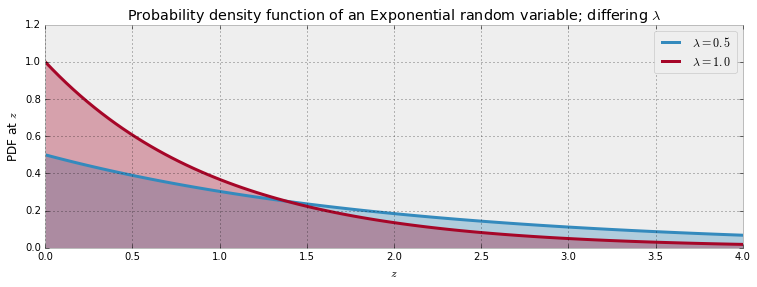

In [5]:
a = np.linspace(0, 4, 100)
expo = stats.expon
lambda_ = [0.5, 1]

for l, c in zip(lambda_, colours):
    plt.plot(a, expo.pdf(a, scale=1. / l), lw=3,
             color=c, label="$\lambda = %.1f$" % l)
    plt.fill_between(a, expo.pdf(a, scale=1. / l), color=c, alpha=.33)

plt.legend()
plt.ylabel("PDF at $z$")
plt.xlabel("$z$")
plt.ylim(0, 1.2)
plt.title("Probability density function of an Exponential random variable;\
 differing $\lambda$");


### Parameter estimation


- In the real world, $\lambda$ is hidden from us. We see only $Z$, and must go backwards to try and determine $\lambda$. 
- The problem is difficult because there is no one-to-one mapping from $Z$ to $\lambda$. 
- Many different methods have been created to solve the problem of estimating $\lambda$, but since $\lambda$ is never actually observed, no one can say for certain which method is best! 


- Bayesian inference is concerned with *beliefs* about what $\lambda$ might be. 
- Rather than try to guess $\lambda$ exactly, we can only talk about what $\lambda$ is likely to be by assigning a probability distribution to $\lambda$.

**Recall that under Bayesian philosophy, we *can* assign probabilities if we interpret them as beliefs. And it is entirely acceptable to have *beliefs* about the parameter $\lambda$.**



##### Example: Inferring behaviour from text-message data

>  You are given a series of daily text-message counts from a user of your system. The data, plotted over time, appears in the chart below. You are curious to know if the user's text-messaging habits have changed over time, either gradually or suddenly. How can you model this? 


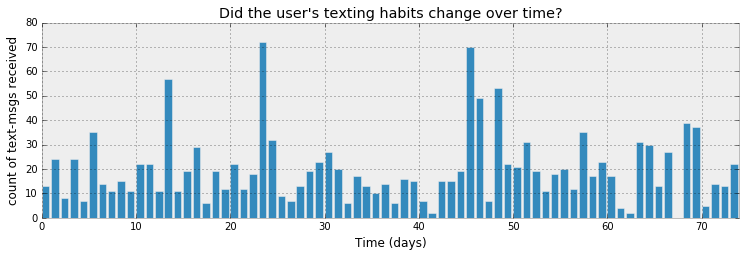

In [6]:
figsize(12.5, 3.5)
count_data = np.loadtxt("data/txtdata.csv")
n_count_data = len(count_data)
plt.bar(np.arange(n_count_data), count_data, color="#348ABD")
plt.xlabel("Time (days)")
plt.ylabel("count of text-msgs received")
plt.title("Did the user's texting habits change over time?")
plt.xlim(0, n_count_data);

Before we start modeling, see what you can figure out just by looking at the chart above. Would you say there was a change in behaviour during this time period? 


- A Poisson random variable is a very appropriate model for this type of *count* data. 

Denoting day $i$'s text-message count by $C_i$, 

$$ C_i \sim \text{Poi}(\lambda)  $$



- We are not sure what the value of the $\lambda$ parameter really is. 
- It appears that the rate might become higher late in the observation period, i.e. $\lambda$ increases at some point during the observations. 

How can we represent this observation mathematically? 


-  Let's assume that on some day during the observation period (call it $\tau$), the parameter $\lambda$ suddenly jumps to a higher value. 

So we really have two $\lambda$ parameters (*switchpoint*):

$$
\lambda = 
\begin{cases}
\lambda_1  & \text{if } t \lt \tau \cr
\lambda_2 & \text{if } t \ge \tau
\end{cases}
$$





If, in reality, no sudden change occurred and indeed $\lambda_1 = \lambda_2$, then the $\lambda$s posterior distributions should look about equal.


To use Bayesian inference, we need to assign prior probabilities to the different possible values of $\lambda$. 

- What would be good prior probability distributions for $\lambda_1$ and $\lambda_2$? 



A good prior distribution is such that the posterior $P(\lambda|Z) $ and the prior $P(\lambda)$ belong to the same family and probability computations are tractable.

- In the case of Poisson distributions, Gamma distributions are good conjugate priors
- Exponential distribution is a particular case of Gamma distribution

We use Exponential distribution as conjugate prior for $\lambda$.



But the exponential distribution takes a parameter of its own, which must be included in the model. 

\begin{align}
&\lambda_1 \sim \text{Exp}( \alpha ) \\\
&\lambda_2 \sim \text{Exp}( \alpha )
\end{align}

$\alpha$ is called a *hyper-parameter* or *parent variable*. 



The exponential distribution models the time between two events.

- Rule of thumb: set the exponential parameter equal to the inverse of the average of the count data. 

$$\frac{1}{N}\sum_{i=0}^N \;C_i \approx E[\; \lambda \; |\; \alpha ] = \frac{1}{\alpha}$$ 



Alternative approach: two priors,one for each $\lambda_i$. Creating two exponential distributions with different $\alpha$ values reflects our prior belief that the rate changed at some point during the observations.


The parameter $\tau$ must be modeled too.

- we can assign a *uniform prior belief* to every possible day. 

\begin{align}
& \tau \sim \text{DiscreteUniform(1,70) }\\\\
& \Rightarrow P( \tau = k ) = \frac{1}{70}
\end{align}



## PyMC


- PyMC is a Python library for programming Bayesian analysis. 

- PyMC enables *probabilistic programming*: we create probability models using programming variables as the model's components. 
- Model components are first-class primitives within the PyMC framework. 

In [4]:
import pymc as pm

count_data = np.loadtxt("data/txtdata.csv")
n_count_data = len(count_data)

alpha = 1.0 / count_data.mean()  # Recall count_data is the
                                 # variable that holds our txt counts
lambda_1 = pm.Exponential("lambda_1", alpha)
lambda_2 = pm.Exponential("lambda_2", alpha)

tau = pm.DiscreteUniform("tau", lower=0, upper=n_count_data)

In the code above, we create the PyMC variables corresponding to $\lambda_1$ and $\lambda_2$. We assign them to PyMC's *stochastic variables*, so-called because they are treated by the back end as random number generators. We can demonstrate this fact by calling their built-in `random()` methods.

In [5]:
print("Random output:", tau.random(), tau.random(), tau.random())

Random output: 74 50 10


In [6]:
@pm.deterministic
def lambda_(tau=tau, lambda_1=lambda_1, lambda_2=lambda_2):
    out = np.zeros(n_count_data)
    out[:tau] = lambda_1  # lambda before tau is lambda1
    out[tau:] = lambda_2  # lambda after (and including) tau is lambda2
    return out

This code creates a new function `lambda_`, but really we can think of it as a random variable: the random variable $\lambda$ from above. Note that because `lambda_1`, `lambda_2` and `tau` are random, `lambda_` will be random. We are **not** fixing any variables yet.

`@pm.deterministic` is a decorator that tells PyMC this is a deterministic function. That is, if the arguments were deterministic (which they are not), the output would be deterministic as well.  

In [7]:
observation = pm.Poisson("obs", lambda_, value=count_data, observed=True)

model = pm.Model([observation, lambda_1, lambda_2, tau])

The variable `observation` combines our data, `count_data`, with our proposed data-generation scheme, given by the variable `lambda_`, through the `value` keyword. We also set `observed = True` to tell PyMC that this should stay fixed in our analysis. Finally, PyMC wants us to collect all the variables of interest and create a `Model` instance out of them. 

We can plot a histogram of the random variables to see what the posterior distributions look like. Below, we collect the samples (called *traces*) into histograms.

In [8]:
# Mysterious code to be explained later
mcmc = pm.MCMC(model)
mcmc.sample(40000, 10000, 1)

/home/corrado/anaconda3/envs/GII2/lib/python3.6/site-packages/pymc/MCMC.py:81: UserWarning: Instantiating a Model object directly is deprecated. We recommend passing variables directly to the Model subclass.
  warnings.warn(message)


 [-----------------100%-----------------] 40000 of 40000 complete in 5.4 sec

In [9]:
lambda_1_samples = mcmc.trace('lambda_1')[:]
lambda_2_samples = mcmc.trace('lambda_2')[:]
tau_samples = mcmc.trace('tau')[:]

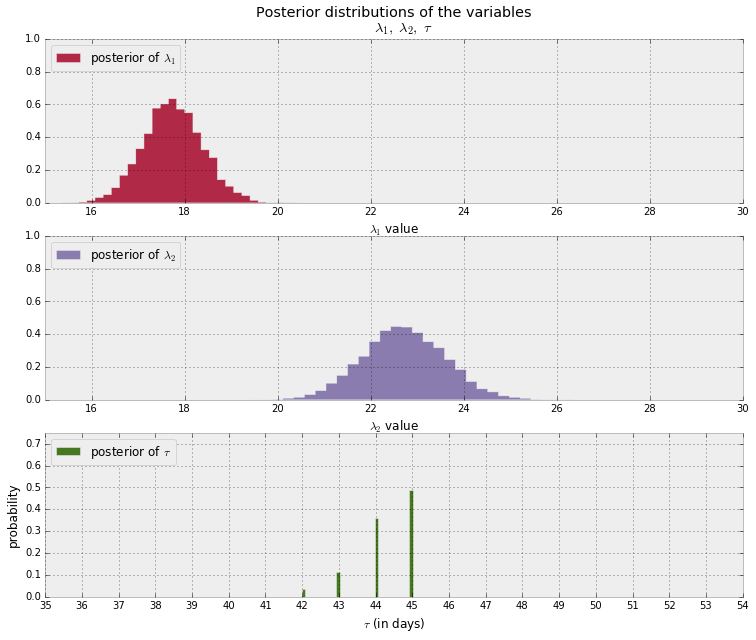

In [13]:
figsize(12.5, 10)
# histogram of the samples:

ax = plt.subplot(311)
ax.set_autoscaley_on(False)

plt.hist(lambda_1_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_1$", color="#A60628", normed=True)
plt.legend(loc="upper left")
plt.title(r"""Posterior distributions of the variables
    $\lambda_1,\;\lambda_2,\;\tau$""")
plt.xlim([15, 30])
plt.xlabel("$\lambda_1$ value")

ax = plt.subplot(312)
ax.set_autoscaley_on(False)
plt.hist(lambda_2_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_2$", color="#7A68A6", normed=True)
plt.legend(loc="upper left")
plt.xlim([15, 30])
plt.xlabel("$\lambda_2$ value")

plt.subplot(313)
w = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)
plt.hist(tau_samples, bins=n_count_data, alpha=1,
         label=r"posterior of $\tau$",
         color="#467821", weights=w, rwidth=2.)
plt.xticks(np.arange(n_count_data))

plt.legend(loc="upper left")
plt.ylim([0, .75])
plt.xlim([35, len(count_data) - 20])
plt.xlabel(r"$\tau$ (in days)")
plt.ylabel("probability");

### Interpretation

- Recall that Bayesian methodology returns a *distribution*. 
- Hence we now have distributions to describe the unknown $\lambda$s and $\tau$. 

What have we gained? 

- we can see the uncertainty in our estimates: the wider the distribution, the less certain our posterior belief should be. 
- We can also see what the plausible values for the parameters are $\lambda_1$ is around 18 and $\lambda_2$ is around 23. 
    - The posterior distributions of the two $\lambda$s are clearly distinct, indicating that it is indeed likely that there was a change in the user's text-message behaviour.


What other observations can you make? If you look at the original data again, do these results seem reasonable? 


- Notice that the posterior distributions for the $\lambda$s do not look like exponential distributions, even though our priors for these variables were exponential. 
    - In fact, the posterior distributions are not really of any form that we recognize from the original model. 
- This is one of the benefits of taking a computational point of view. 


- Our analysis also returned a distribution for $\tau$. 
- We can see that near day 45, there was a 50% chance that the user's behaviour changed. 
- Had no change occurred, or had the change been gradual over time, the posterior distribution of $\tau$ would have been more spread out, reflecting that many days were plausible candidates for $\tau$. 
- By contrast, in the actual results we see that only three or four days make any sense as potential transition points. 

### sampling the posterior

> What is the expected number of texts at day $t, \; 0 \le t \le 70$ ? 

Recall that the expected value of a Poisson variable is equal to its parameter $\lambda$. Therefore, the question is equivalent to 

> what is the expected value of $\lambda$ at time $t$*


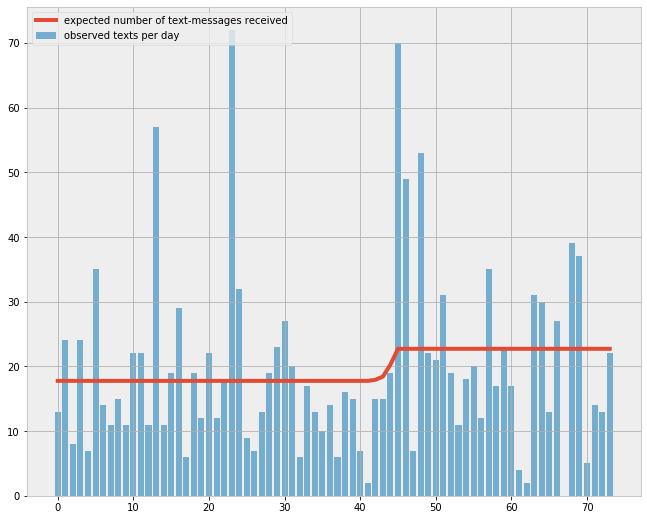

In [28]:
# tau_samples, lambda_1_samples, lambda_2_samples contain
# N samples from the corresponding posterior distribution
N = tau_samples.shape[0]
expected_texts_per_day = np.zeros(n_count_data)
for day in range(0, n_count_data):
    # ix is a bool index of all tau samples corresponding to
    # the switchpoint occurring prior to value of 'day'
    ix = day < tau_samples

    expected_texts_per_day[day] = (lambda_1_samples[ix].sum()
                                   + lambda_2_samples[~ix].sum()) / N


plt.plot(range(n_count_data), expected_texts_per_day, lw=4, color="#E24A33",
         label="expected number of text-messages received")

plt.bar(np.arange(len(count_data)), count_data, color="#348ABD", alpha=0.65,
        label="observed texts per day")

plt.legend(loc="upper left");

Our analysis shows strong support for believing the user's behavior did change ($\lambda_1$ would have been close in value to $\lambda_2$ had this not been true), and that the change was sudden rather than gradual (as demonstrated by $\tau$'s strongly peaked posterior distribution).


##### Exercises

1\.  Using `lambda_1_samples` and `lambda_2_samples`, what is the mean of the posterior distributions of $\lambda_1$ and $\lambda_2$?

In [25]:
# type your code here.

2\.  What is the expected percentage increase in text-message rates? `hint:` compute the mean of `lambda_1_samples/lambda_2_samples`. Note that this quantity is very different from `lambda_1_samples.mean()/lambda_2_samples.mean()`.

In [26]:
# type your code here.

3\. What is the mean of $\lambda_1$ **given** that we know $\tau$ is less than 45.  That is, suppose we have been given new information that the change in behaviour occurred prior to day 45. What is the expected value of $\lambda_1$ now? (You do not need to redo the PyMC part. Just consider all instances where `tau_samples < 45`.)

In [17]:
# type your code here.

In [26]:
from IPython.core.display import HTML


def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()